## tests for different optimization method hyperparams

In [ ]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *



### voice data prep

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data_voice = pd.read_csv('voice.csv')
data_voice_cut = data_voice.sample(100)

In [3]:
data_size = len(data_voice_cut.index)

voice_X = data_voice_cut.iloc[:, :-1]
voice_y = data_voice_cut.iloc[:, -1]

# code categories to -1/1
gender_encoder = LabelEncoder()
voice_y = np.array(gender_encoder.fit_transform(voice_y))
voice_y = voice_y * 2 - 1

# normalize data
scaler = StandardScaler()
scaler.fit(voice_X)
voice_X = np.array(scaler.transform(voice_X))
voice_X = voice_X[:,0:6]

random = np.array([rd.randint(0, 1) * 2 - 1 for x in range(data_size)])

In [190]:
save_file('histories/voice_tricky_random',random)

### testing

In [4]:
BOUND = 5
MARGIN = 0.2

PUMP_X = voice_X
PUMP_Y = voice_y

samples_per_cycle = 10
pump_cycles = 1

rpss=[1,2,3,4,5]
acc=-5
temp=50000
maxiter=1000

In [5]:
rpss

[1, 2, 3, 4, 5]

In [7]:
for pc in range(pump_cycles):
    for rps in rpss:
        print("\npc",pc,"rps",rps,"acc", acc, "temp", temp,"maxiter",maxiter)

        DATA_SAVE_NAME = 'histories/rpss/rps_' + str(rps)

        try:
            history = load_file(DATA_SAVE_NAME)
        except:
            history = RDhistory('margin_loss')

        for i in range(samples_per_cycle):
            
            radvec = [rd.randint(0, 1) * 2 - 1 for x in range(data_size)]
            
            print(pc * samples_per_cycle + i,end=' ')
            
            samples_accumulated = len(history.hypothesis)

            pump_rademacher(PUMP_X, PUMP_Y,
                            history,
                            radvec=radvec,
                            runs_per_sample=rps,
                            margin=MARGIN,
                            bound=BOUND,
                            verbose=False,
                            method='da', kwargs={'maxiter':maxiter, 'initial_temp':temp, 'accept':acc})

            # history.complexity.append([samples_accumulated + sample_step, calc_complexity(history)])
            
            save_file(DATA_SAVE_NAME, history)        


pc 0 rps 1 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 2 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 3 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 4 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 
pc 0 rps 5 acc -5 temp 50000 maxiter 1000
0 1 2 3 4 5 6 7 8 9 

### accepts

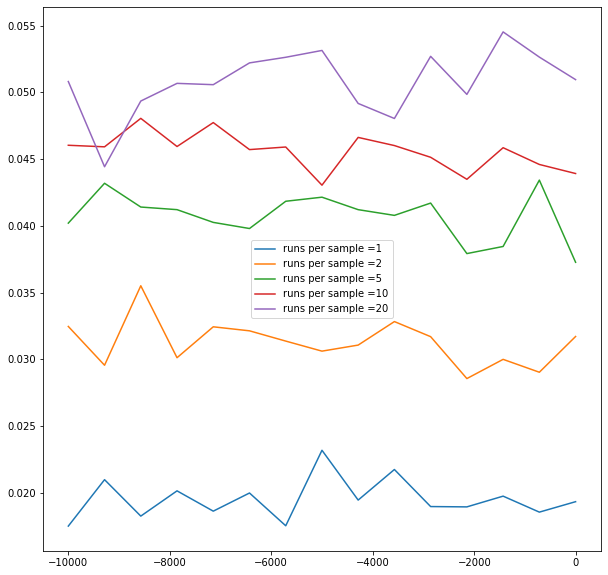

In [9]:
plt.figure(figsize=(10,10))
accepts=np.rint(np.linspace(-1e4,-5,15)).astype(int)
rpss=[1,2,5,10,20]
for rps in rpss:
    comps = []
    for acc in accepts:
        history = load_file('histories/accepts_rps'+str(rps)+'/acc_' + str(acc)+'_history.txt')
        comps.append(calc_complexity(history))
    plt.plot(accepts, comps, label="runs per sample ="+str(rps))

plt.legend()
plt.show()

### runs per sample

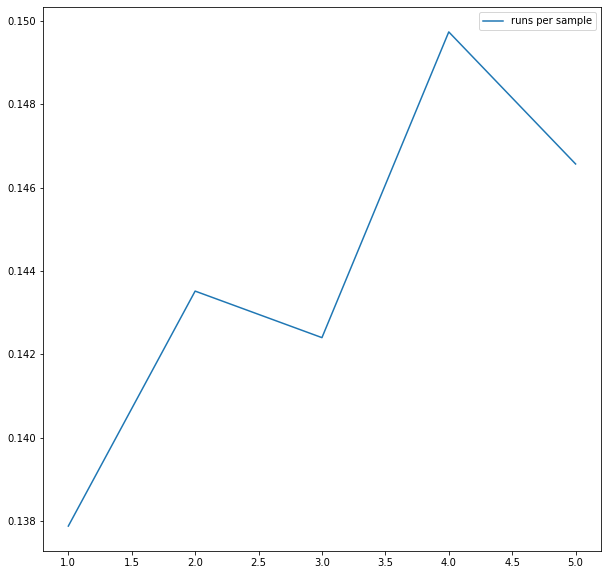

In [10]:
plt.figure(figsize=(10,10))
comps = []

rpss=[1,2,3,4,5]
acc=-5
temp=50000
maxiter=1000

for rps in rpss:
    history = load_file('histories/rpss/rps_'+str(rps)+'_history.txt')
    comps.append(calc_complexity(history))
plt.plot(rpss, comps, label="runs per sample")


plt.legend()
plt.show()

### temps

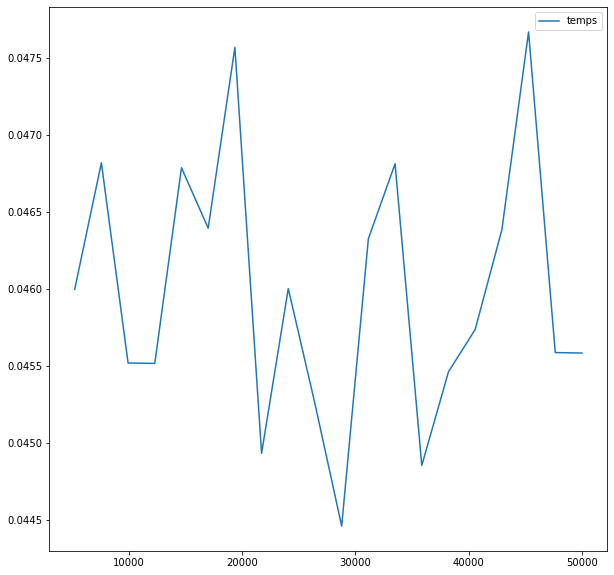

In [11]:
plt.figure(figsize=(10,10))
comps = []

rps=10
acc=-5
temps=np.linspace(5230,50000,20)

for temp in temps:
    history = load_file('histories/temps/temp_'+str(temp)+'_history.txt')
    comps.append(calc_complexity(history))
plt.plot(temps, comps, label="temps")


plt.legend()
plt.show()